In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# print((X_train[0], y_train[0]))
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)
# print((X_test[0], y_test[0]))

uint8 uint8 uint8 uint8


In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)
print(y_test)

[3 8 8 ... 5 1 7]


In [8]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [9]:
classes = ['airplane', 'automobile','bird','cat','deer','dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

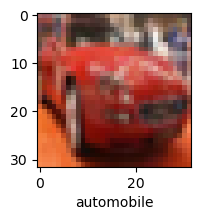

In [12]:
plot_sample(X_train, y_train, 5)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train[0], X_test[0],y_train[0],y_test[0])

[[[3.55820914e-06 3.73913502e-06 3.79944365e-06]
  [2.59327106e-06 2.77419695e-06 2.71388832e-06]
  [3.01543147e-06 2.89481421e-06 2.59327106e-06]
  ...
  [9.52876345e-06 7.96073908e-06 6.51333198e-06]
  [9.16691167e-06 7.53857868e-06 6.15148020e-06]
  [8.92567715e-06 7.47827005e-06 6.21178883e-06]]

 [[9.64938071e-07 1.20617259e-06 1.20617259e-06]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.08555533e-06 4.82469035e-07 0.00000000e+00]
  ...
  [7.41796142e-06 5.30715939e-06 3.31697462e-06]
  [7.17672690e-06 5.00561624e-06 3.01543147e-06]
  [7.35765279e-06 5.24685076e-06 3.43759188e-06]]

 [[1.50771574e-06 1.44740711e-06 1.26648122e-06]
  [9.64938071e-07 4.22160406e-07 0.00000000e+00]
  [2.95512284e-06 1.62833299e-06 4.82469035e-07]
  ...
  [7.11641827e-06 5.06592487e-06 3.01543147e-06]
  [7.23703553e-06 5.06592487e-06 3.01543147e-06]
  [6.57364061e-06 4.40252995e-06 2.53296244e-06]]

 ...

 [[1.25441949e-05 1.02524670e-05 5.78962842e-06]
  [1.21220345e-05 9.22722030e-06 2.0504

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10, activation ='softmax')
])

ann.compile(optimizer ='SGD',
           loss ='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
 641/1563 [===========>..................] - ETA: 46s - loss: 2.3026 - accuracy: 0.1018

In [35]:
# print(X_test) 

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
# print(X_test[:5])
print(y_test)
print(y_pred_classes.dtype)
print(y_pred)
print(y_pred_classes)
# print('classification report : \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 11ms/step
[3 8 8 ... 5 1 7]


AttributeError: 'list' object has no attribute 'dtype'

In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [45]:
cnn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [46]:
val_images = X_train[:5000]
partial_images = X_train[5000:]
val_labels = y_train[:5000]
partial_labels = y_train[5000:]

In [47]:
# cnn.fit(X_train, y_train, epochs = 10)
cnn.fit(partial_images, partial_labels, batch_size=32,
                    epochs=25, validation_data=(val_images, val_labels))

Epoch 1/25
1407/1407 [==============================] - 25s 17ms/step - loss: 1.6489 - accuracy: 0.3925 - val_loss: 1.4370 - val_accuracy: 0.4812
Epoch 2/25
1407/1407 [==============================] - 25s 17ms/step - loss: 1.2968 - accuracy: 0.5350 - val_loss: 1.2952 - val_accuracy: 0.5420
Epoch 3/25
1407/1407 [==============================] - 24s 17ms/step - loss: 1.1641 - accuracy: 0.5875 - val_loss: 1.1222 - val_accuracy: 0.6040
Epoch 4/25
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0830 - accuracy: 0.6171 - val_loss: 1.0895 - val_accuracy: 0.6162
Epoch 5/25
1407/1407 [==============================] - 24s 17ms/step - loss: 1.0149 - accuracy: 0.6422 - val_loss: 1.0689 - val_accuracy: 0.6304
Epoch 6/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.9649 - accuracy: 0.6591 - val_loss: 0.9913 - val_accuracy: 0.6620
Epoch 7/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.9200 - accuracy: 0.6775 - val_loss: 1.0052 -

In [48]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0365 - accuracy: 0.6840


[1.0365278720855713, 0.6840000152587891]

In [54]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 0, 0, 4]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

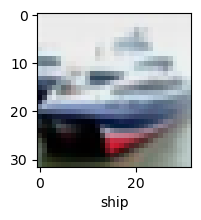

In [56]:
plot_sample(X_test, y_test, 1)

In [59]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.46021252e-03, 2.68018430e-05, 1.46066770e-02, 3.03045034e-01,
        1.23895044e-02, 6.38613880e-01, 2.13999432e-02, 4.26417682e-03,
        7.33222114e-04, 3.46055953e-03],
       [8.00070725e-03, 5.32854989e-04, 1.29400988e-07, 3.43784450e-06,
        6.88803112e-08, 1.98013595e-07, 9.37832256e-10, 1.12810937e-06,
        9.91304994e-01, 1.56504379e-04],
       [2.80533973e-02, 1.08630344e-01, 6.06593734e-04, 7.09402142e-03,
        1.97084341e-03, 1.82608317e-03, 9.02681903e-04, 3.02987802e-03,
        1.21556157e-02, 8.35730553e-01],
       [5.55654943e-01, 1.32496096e-03, 6.74584927e-03, 9.19920974e-04,
        3.86812654e-03, 1.93473024e-04, 5.29976794e-04, 1.24060301e-04,
        4.30340230e-01, 2.98439962e-04],
       [3.79388126e-07, 8.63482967e-07, 6.32283511e-04, 4.40433584e-02,
        9.17830169e-01, 3.78791662e-03, 3.36924605e-02, 7.70459246e-06,
        1.58263629e-06, 3.34007268e-06]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 9, 0, 4]

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

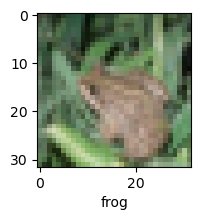

In [73]:
plot_sample(X_test, y_test, 4)

In [74]:
classes[y_classes[4]]

'deer'

In [75]:
print('classification report : \n', classification_report(y_test, y_classes))

classification report : 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.81      0.80      0.80      1000
           2       0.60      0.56      0.58      1000
           3       0.44      0.58      0.50      1000
           4       0.62      0.67      0.64      1000
           5       0.63      0.52      0.57      1000
           6       0.78      0.74      0.76      1000
           7       0.72      0.74      0.73      1000
           8       0.79      0.78      0.78      1000
           9       0.79      0.73      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000

